# Describing Caravan Customers

Association rules using product premium varaibles.

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29

**Research questions**

In this section, following research questions are solved.

Q2. **Describe** the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q5. What **frequent associations** can be identified in the product ownership data?

**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

##  **Approach**

*  Exploratory Data Analysis (EDA):

*   Market Basket analysis

     Approach 1 - Apriori Algorithm

     Aprroach 2 - Fpgrowth Algorithm

*   Evaluation

       Matrics - confidence, support, lift

       run time





**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
#import squarify
import networkx as nx
import warnings
import matplotlib as mpl
#import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

!pip install squarify
import squarify

**Association Rules**

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.


**SUPPORT** = A simple way to control complexity is to place a constraint that such rules must apply to some minimum percentage of the of the data

    support(A→C)=support(A∪C),range: [0,1]

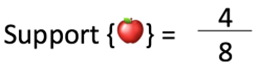

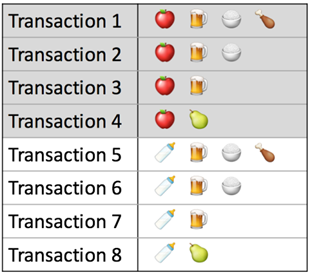



**CONFIDENCE** = The probability that B occurs when A; it is p(B|A), which in association mining.

confidence(A→C)=support(A→C)support(A),range: [0,1]

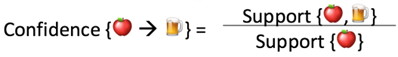


**LIFT** = the co-occurrence of A and B is the probability that we actually see the two together, compared to the probability that we would see the two together if they were unrelated to (independent of) each other.

lift(A→C)=confidence(A→C)support(C),range: [0,∞]

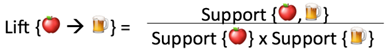




**Loading COIL 2000 Dataset**

In [ ]:
# this is the original file. using for exploratory data analysis
#df1 = pd.read_csv("/content/ticdata2000_w_hd.csv")
# this is the file given for evaluation
#df2 = pd.read_csv("/content/ticeval2000_w_hd.csv")

# combining target column to validation file
#df3=df2.merge(df2_tg, left_index=True, right_index=True)
# using the encoded file prepared in prediction task
df_tr = pd.read_csv("/content/ticdata2000_w_hd.csv")
df_val = pd.read_csv("/content/ticeval2000_w_hd.csv")
df_val_tg = pd.read_csv("/content/tictgts2000.txt")
df_val_tg.columns=['po_ins_pol_caravan']
# combining target column to validation file
df_val2=df_val.merge(df_val_tg, left_index=True, right_index=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Using all data to make a larger sample to apply association rules
df = pd.concat([df_tr,df_val2])
df        = df.reset_index()
print(df_tr.shape)
print(df_val2.shape)
df.shape

(5822, 86)
(3999, 86)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9821, 87)

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,sd_rel_living_tg,sd_rel_other,sd_rel_no_singles,sd_hshold_wo_children,sd_hshold_w_children,sd_education_higher,sd_education_medium,sd_education_lower,sd_empst_high,sd_empst_Entrepr,sd_empst_farmer,sd_empst_mdl_mgmt,sd_empst_skill_labour,sd_empst_unskill_labour,sd_socialclassA,sd_socialclassB1,sd_socialclassB2,sd_socialclassC,sd_socialclassD,sd_rentedhouse,sd_homeowners,sd_car_1,sd_car_2,sd_car_0,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_car,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
0,0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# size of datasets
print('df ', df.shape)

df  (9821, 87)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Preparation

Get all product premium variables

In [ ]:
# separate product premium  variables
df_prd = df[df.columns[pd.Series(df.columns).str.startswith('po_ins_pol_')]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# adding index as customer id
df_prd        = df_prd.rename_axis('po_customer_id').reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_prd.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_ins_pol_caravan
0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,2,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0


use one-hot encoding to get product and premium values to columns

In [ ]:
# encoding  dataset
cat_cols=df_prd.iloc[:,1:23].columns  # list of columns to encode

# Create a copy of the data frame in memory with a different name
df_onehot=df_prd.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df_prd,  columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,po_ins_pol_thirdparty_pvt_0,po_ins_pol_thirdparty_pvt_1,po_ins_pol_thirdparty_pvt_2,po_ins_pol_thirdparty_pvt_3,po_ins_pol_thirdparty_firms_0,po_ins_pol_thirdparty_firms_1,po_ins_pol_thirdparty_firms_2,po_ins_pol_thirdparty_firms_3,po_ins_pol_thirdparty_firms_4,po_ins_pol_thirdparty_firms_5,po_ins_pol_thirdparty_firms_6,po_ins_pol_thirdparty_agri_0,po_ins_pol_thirdparty_agri_1,po_ins_pol_thirdparty_agri_2,po_ins_pol_thirdparty_agri_3,po_ins_pol_thirdparty_agri_4,po_ins_pol_car_0,po_ins_pol_car_4,po_ins_pol_car_5,po_ins_pol_car_6,po_ins_pol_car_7,po_ins_pol_car_8,po_ins_pol_car_9,po_ins_pol_del_van_0,po_ins_pol_del_van_5,po_ins_pol_del_van_6,po_ins_pol_del_van_7,po_ins_pol_motorcycle_sc_0,po_ins_pol_motorcycle_sc_3,po_ins_pol_motorcycle_sc_4,po_ins_pol_motorcycle_sc_5,po_ins_pol_motorcycle_sc_6,po_ins_pol_motorcycle_sc_7,po_ins_pol_lorry_0,po_ins_pol_lorry_4,po_ins_pol_lorry_6,po_ins_pol_lorry_7,po_ins_pol_lorry_9,po_ins_pol_trailer_0,po_ins_pol_trailer_1,po_ins_pol_trailer_2,po_ins_pol_trailer_3,po_ins_pol_trailer_4,po_ins_pol_trailer_5,po_ins_pol_tractor_0,po_ins_pol_tractor_3,po_ins_pol_tractor_4,po_ins_pol_tractor_5,po_ins_pol_tractor_6,po_ins_pol_tractor_7,po_ins_pol_agri_machines_0,po_ins_pol_agri_machines_1,po_ins_pol_agri_machines_2,po_ins_pol_agri_machines_3,po_ins_pol_agri_machines_4,po_ins_pol_agri_machines_6,po_ins_pol_moped_0,po_ins_pol_moped_2,po_ins_pol_moped_3,po_ins_pol_moped_4,po_ins_pol_moped_5,po_ins_pol_moped_6,po_ins_pol_life_0,po_ins_pol_life_1,po_ins_pol_life_2,po_ins_pol_life_3,po_ins_pol_life_4,po_ins_pol_life_5,po_ins_pol_life_6,po_ins_pol_life_7,po_ins_pol_life_8,po_ins_pol_life_9,po_ins_pol_accident_ins_pvt_0,po_ins_pol_accident_ins_pvt_1,po_ins_pol_accident_ins_pvt_2,po_ins_pol_accident_ins_pvt_3,po_ins_pol_accident_ins_pvt_4,po_ins_pol_accident_ins_pvt_5,po_ins_pol_accident_ins_pvt_6,po_ins_pol_accident_ins_fam_0,po_ins_pol_accident_ins_fam_2,po_ins_pol_accident_ins_fam_3,po_ins_pol_disability_0,po_ins_pol_disability_4,po_ins_pol_disability_5,po_ins_pol_disability_6,po_ins_pol_disability_7,po_ins_pol_fire_0,po_ins_pol_fire_1,po_ins_pol_fire_2,po_ins_pol_fire_3,po_ins_pol_fire_4,po_ins_pol_fire_5,po_ins_pol_fire_6,po_ins_pol_fire_7,po_ins_pol_fire_8,po_ins_pol_surfboard_0,po_ins_pol_surfboard_1,po_ins_pol_surfboard_2,po_ins_pol_surfboard_3,po_ins_pol_boat_0,po_ins_pol_boat_1,po_ins_pol_boat_2,po_ins_pol_boat_3,po_ins_pol_boat_4,po_ins_pol_boat_5,po_ins_pol_boat_6,po_ins_pol_bicycle_0,po_ins_pol_bicycle_1,po_ins_pol_property_0,po_ins_pol_property_1,po_ins_pol_property_2,po_ins_pol_property_3,po_ins_pol_property_4,po_ins_pol_property_5,po_ins_pol_property_6,po_ins_pol_social security_0,po_ins_pol_social security_2,po_ins_pol_social security_3,po_ins_pol_social security_4,po_ins_pol_social security_5,po_ins_pol_caravan_0,po_ins_pol_caravan_1
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

dropping varaibles with '_0' as it represent 0 premium (no policy)

In [ ]:
# filtering columns to drop
col_drop = df_onehot.filter(like ='_0').columns
# dropping columns
df_onehot.drop(col_drop, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transpose rows and columns

In [ ]:
# bring products to a columns
df_prd2 = df_onehot.melt(id_vars=["po_customer_id"], var_name="product_name", value_name="product_count").sort_values(['po_customer_id', 'product_name']).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_prd2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
0,0,po_ins_pol_accident_ins_fam_2,0
1,0,po_ins_pol_accident_ins_fam_3,0
2,0,po_ins_pol_accident_ins_pvt_1,0
3,0,po_ins_pol_accident_ins_pvt_2,0
4,0,po_ins_pol_accident_ins_pvt_3,0


In [ ]:
df_prd3 = pd.DataFrame(df_prd2[df_prd2['product_count']>0])
df_prd3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
22,0,po_ins_pol_car_6,1
38,0,po_ins_pol_fire_5,1
136,1,po_ins_pol_fire_2,1
190,1,po_ins_pol_thirdparty_pvt_2,1
224,2,po_ins_pol_car_6,1
237,2,po_ins_pol_fire_2,1
291,2,po_ins_pol_thirdparty_pvt_2,1
325,3,po_ins_pol_car_6,1
338,3,po_ins_pol_fire_2,1
443,4,po_ins_pol_fire_6,1


In [ ]:
# setting all product counts to 1
df_prd3['product_count'] = np.where(df_prd3['product_count'] >=1, 1, 0)
df_prd3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
22,0,po_ins_pol_car_6,1
38,0,po_ins_pol_fire_5,1
136,1,po_ins_pol_fire_2,1
190,1,po_ins_pol_thirdparty_pvt_2,1
224,2,po_ins_pol_car_6,1
237,2,po_ins_pol_fire_2,1
291,2,po_ins_pol_thirdparty_pvt_2,1
325,3,po_ins_pol_car_6,1
338,3,po_ins_pol_fire_2,1
443,4,po_ins_pol_fire_6,1


# Exploratory Data Analysis

**Top 10 First Choices in Products**

In [ ]:
# get value counts of product and get top 5 products
prd5=df_prd3['product_name'].value_counts().iloc[:10]
print('prd5 ', prd5.head(15))
prd6=prd5.rename_axis('product_name2').reset_index()
prd7=prd6.rename(columns={'product_name2':'product_name', 'product_name':'prd_count'})


prd5  po_ins_pol_car_6               3910
po_ins_pol_thirdparty_pvt_2    3561
po_ins_pol_fire_4              2141
po_ins_pol_fire_3              1541
po_ins_pol_car_5               1013
po_ins_pol_fire_2               901
po_ins_pol_caravan_1            586
po_ins_pol_moped_3              481
po_ins_pol_thirdparty_pvt_1     341
po_ins_pol_fire_5               263
Name: product_name, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# getting records of top 10 products from the database. Keeping only selected products in the product file.
prd8=pd.merge(df_prd3, prd7, on='product_name')
prd8.drop('prd_count', axis=1, inplace=True)

prd8['product'] = 'Products'
products = nx.from_pandas_edgelist(prd8, source = 'product', target = 'product_name', edge_attr = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Products': Text(-0.0034384128414849846, 0.0009470146305239281, 'Products'),
 'po_ins_pol_car_6': Text(-0.9812574503902519, -0.21466783454655503, 'po_ins_pol_car_6'),
 'po_ins_pol_fire_5': Text(-0.5127664069004316, 0.8752800360839098, 'po_ins_pol_fire_5'),
 'po_ins_pol_fire_2': Text(0.6697357088031339, 0.757481702267189, 'po_ins_pol_fire_2'),
 'po_ins_pol_thirdparty_pvt_2': Text(0.9351959303928024, -0.4080043404068791, 'po_ins_pol_thirdparty_pvt_2'),
 'po_ins_pol_moped_3': Text(-0.6714910665263697, -0.7558815866778935, 'po_ins_pol_moped_3'),
 'po_ins_pol_car_5': Text(0.09598868182567855, 0.9918621280092477, 'po_ins_pol_car_5'),
 'po_ins_pol_fire_3': Text(-0.09858375193337525, -1.0, 'po_ins_pol_fire_3'),
 'po_ins_pol_fire_4': Text(0.5031593537387606, -0.8598432695152854, 'po_ins_pol_fire_4'),
 'po_ins_pol_caravan_1': Text(-0.9097024347434475, 0.3991464388649667, 'po_ins_pol_caravan_1'),
 'po_ins_pol_thirdparty_pvt_1': Text(0.9731598485749859, 0.2136797112907753, 'po_ins_pol_thirdparty_

(-1.1864712667816018,
 1.1783736649663359,
 -1.2091455234409711,
 1.2010076514502188)

Text(0.5, 1.0, 'Top 10 First Choices in Products')

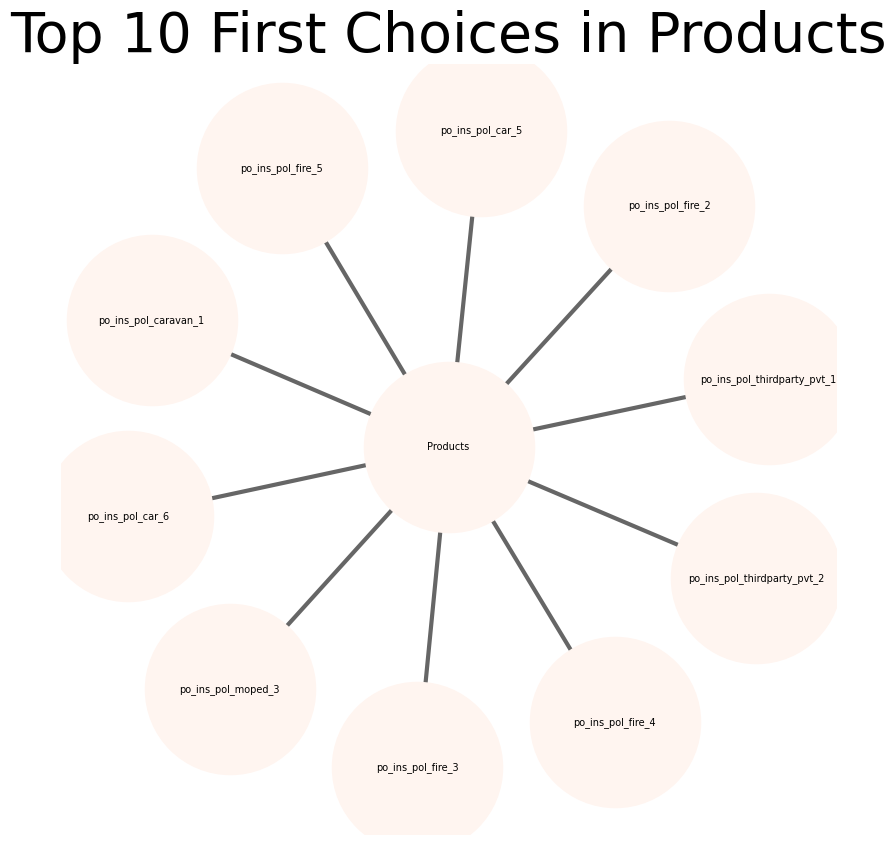

In [ ]:
# Visualise top 10 products
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,10)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 7)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)

#plt.show()
plt.savefig("Top_10_Products.png")
#plt.savefig("Top_10_Products", format="PNG")

Bar plot most bought product

<Axes: >

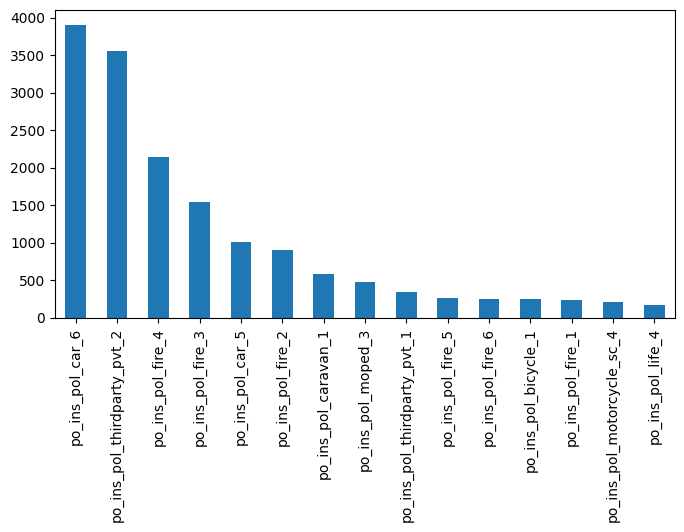

In [ ]:
# Bar plot - Top 10 products
df_freq_products=df_prd3['product_name'].value_counts().iloc[:15]
fig=plt.figure(figsize=(8, 4))
df_freq_products.plot.bar()

Tree map of most bought product Premium size

In [ ]:
#array of most bought product
y=df_freq_products.head(5).to_frame()

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

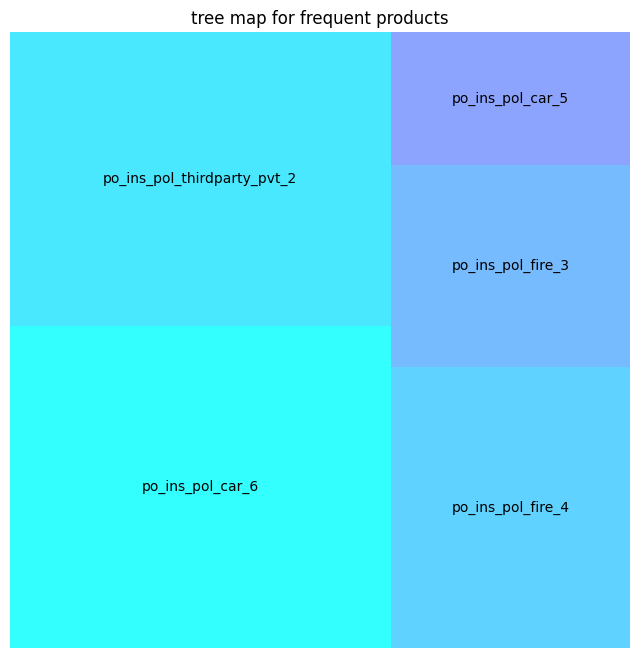

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
color=plt.cm.cool(np.linspace(0,1,10))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Market Basket Analysis



# Q5. What frequent associations can be identified in the product ownership data?

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Main product file with all product premium varailbes.
product_name=df_prd3
product_name.head()

,po_customer_id,product_name,product_count
22,0,po_ins_pol_car_6,1
38,0,po_ins_pol_fire_5,1
136,1,po_ins_pol_fire_2,1
190,1,po_ins_pol_thirdparty_pvt_2,1
224,2,po_ins_pol_car_6,1


**Arranging Top Products**

In [ ]:
# counting each product as customers selected
productCountDf = product_name.groupby("product_name",as_index = False)['po_customer_id'].count()

In [ ]:
# sort data, keeping highest count at the top
productCountDf.sort_values(by=['po_customer_id'], inplace=True, ascending=False)

**Top 20 most frequently purchased products**

In [ ]:
topProdFrame = productCountDf.iloc[0:20,:]
productname= topProdFrame.loc[:,["product_name"]]

**Customer records containting the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,19):
    pId = productname.iloc[i]['product_name']
    stDf = product_name[product_name.product_name == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

,po_customer_id,product_name,product_count
22,0,po_ins_pol_car_6,1
224,2,po_ins_pol_car_6,1
325,3,po_ins_pol_car_6,1
527,5,po_ins_pol_car_6,1
628,6,po_ins_pol_car_6,1


In [ ]:
print(product_name.shape)
print(MarketBasketdf.shape)

(17917, 3)
(16353, 3)


**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['po_customer_id','product_name'])['product_count'].sum().unstack().reset_index().fillna(0).set_index('po_customer_id')

In [ ]:
basket.head()

product_name,po_ins_pol_bicycle_1,po_ins_pol_car_5,po_ins_pol_car_6,po_ins_pol_caravan_1,po_ins_pol_fire_1,po_ins_pol_fire_2,po_ins_pol_fire_3,po_ins_pol_fire_4,po_ins_pol_fire_5,po_ins_pol_fire_6,po_ins_pol_life_3,po_ins_pol_life_4,po_ins_pol_moped_3,po_ins_pol_moped_4,po_ins_pol_motorcycle_sc_4,po_ins_pol_thirdparty_agri_4,po_ins_pol_thirdparty_pvt_1,po_ins_pol_thirdparty_pvt_2,po_ins_pol_tractor_3
po_customer_id,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One Hot Encoding

In [ ]:
# Converted the units into 1 encoded value
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

product_name,po_ins_pol_bicycle_1,po_ins_pol_car_5,po_ins_pol_car_6,po_ins_pol_caravan_1,po_ins_pol_fire_1,po_ins_pol_fire_2,po_ins_pol_fire_3,po_ins_pol_fire_4,po_ins_pol_fire_5,po_ins_pol_fire_6,po_ins_pol_life_3,po_ins_pol_life_4,po_ins_pol_moped_3,po_ins_pol_moped_4,po_ins_pol_motorcycle_sc_4,po_ins_pol_thirdparty_agri_4,po_ins_pol_thirdparty_pvt_1,po_ins_pol_thirdparty_pvt_2,po_ins_pol_tractor_3
po_customer_id,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


size and shape of basket

In [ ]:
basket_sets.size

161690

In [ ]:
basket_sets.shape

(8510, 19)

Creating dummy file

In [ ]:
# taking a sample of the basket
dummy=basket_sets.head(8000)

# Apriori Algorithm

Apriori is a join based algorithm for frequent item set mining and association rule learning over a sample set. It proceeds by identifying the frequent individual items in the sample and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the sample.

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Training the Model**

We set the mininum support as 0.001 (rules apply to 0.1% of data), maximum number that being analysed in the basket is 3.

We are doing first pruning and see what we get from the result

In [ ]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets_apri = apriori(dummy, min_support=0.001, max_len =4,  use_colnames=True)
# Association rules using Apriori Algorithm
apriori_rules = association_rules(frequent_itemsets_apri, metric="lift", min_threshold= 1)

In [ ]:
# Sort values based on confidence
apriori_rules2=apriori_rules.sort_values("confidence",ascending=False)

In [ ]:
apriori_rules2.shape

(706, 10)

from sample of 8000 records, apriori algorithm has mined 706 rules:
rule with low support and high confidence is prefered.  ♈

In [ ]:
# Plot Support Vs Coverage(confidence)
def plot_metrics_relationship(rule_matrix, al, col1, col2):
    """
    desc: shows the relationship between the two input columns
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} {} vs {}'.format(al, col1, col2))

    plt.savefig('Support vs confidence')

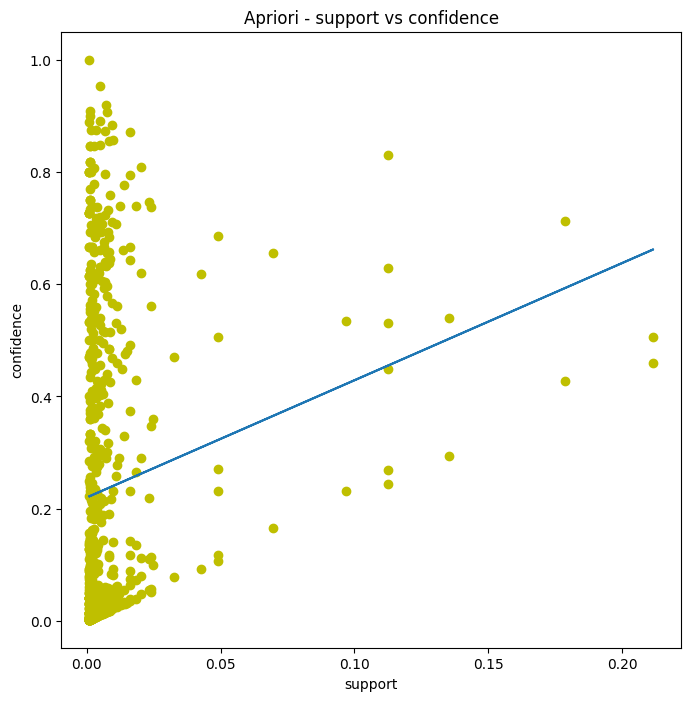

In [ ]:
plot_metrics_relationship(apriori_rules2, al='Apriori -', col1='support', col2='confidence')

Rules for caravan product

In [ ]:
apriori_caravan = apriori_rules2[ (apriori_rules2['consequents'] == {'po_ins_pol_caravan_1'}      )]

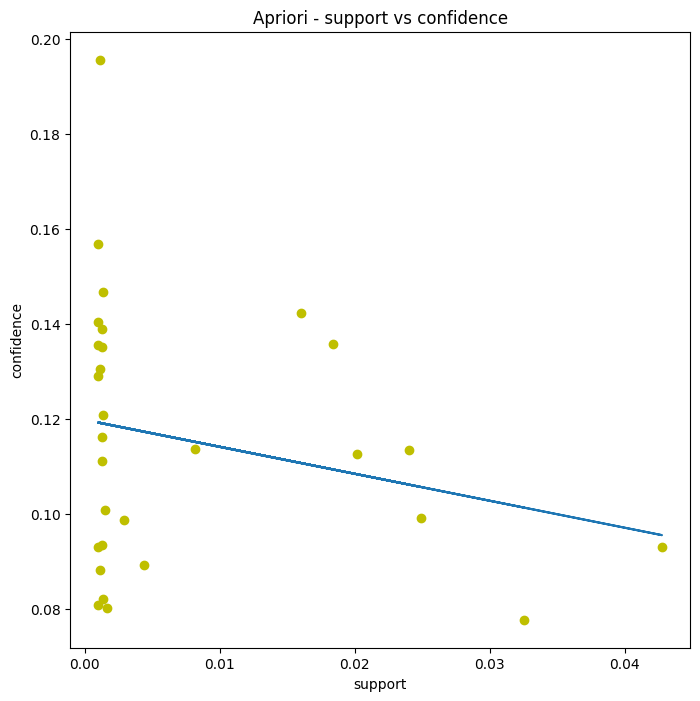

In [ ]:
plot_metrics_relationship(apriori_caravan, al='Apriori -', col1='support', col2='confidence')

With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets.

# Recommendations using Apriori Algorithm

In [ ]:
filtered_rules_apriori_caravan =apriori_caravan[(apriori_caravan['antecedent support'] > 0.007)&
                        (apriori_caravan['confidence'] > 0.115) &
                        (apriori_caravan['lift'] > 1)]

Selecting number of rules

In [ ]:
filtered_rules_apriori_caravan.shape

(11, 10)

In [ ]:
filtered_rules_apriori_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,"(po_ins_pol_bicycle_1, po_ins_pol_car_6)",(po_ins_pol_caravan_1),0.009375,0.069125,0.001375,0.146667,2.121760,0.000727,1.090869,0.533697
509,"(po_ins_pol_car_6, po_ins_pol_fire_4, po_ins_p...",(po_ins_pol_caravan_1),0.112500,0.069125,0.016000,0.142222,2.057464,0.008223,1.085217,0.579115
694,"(po_ins_pol_fire_4, po_ins_pol_thirdparty_pvt_...",(po_ins_pol_caravan_1),0.007125,0.069125,0.001000,0.140351,2.030392,0.000507,1.082855,0.511126
196,"(po_ins_pol_moped_3, po_ins_pol_car_6)",(po_ins_pol_caravan_1),0.009000,0.069125,0.001250,0.138889,2.009243,0.000628,1.081016,0.506862
178,"(po_ins_pol_car_6, po_ins_pol_fire_4)",(po_ins_pol_caravan_1),0.135375,0.069125,0.018375,0.135734,1.963603,0.009017,1.077070,0.567566
552,"(po_ins_pol_car_6, po_ins_pol_thirdparty_pvt_2...",(po_ins_pol_caravan_1),0.007375,0.069125,0.001000,0.135593,1.961566,0.000490,1.076895,0.493845
109,"(po_ins_pol_bicycle_1, po_ins_pol_thirdparty_p...",(po_ins_pol_caravan_1),0.009250,0.069125,0.001250,0.135135,1.954939,0.000611,1.076324,0.493036
537,"(po_ins_pol_car_6, po_ins_pol_life_4, po_ins_p...",(po_ins_pol_caravan_1),0.008625,0.069125,0.001125,0.130435,1.886941,0.000529,1.070506,0.474131
365,"(po_ins_pol_fire_4, po_ins_pol_motorcycle_sc_4)",(po_ins_pol_caravan_1),0.007750,0.069125,0.001000,0.129032,1.866651,0.000464,1.068782,0.467908
190,"(po_ins_pol_car_6, po_ins_pol_life_4)",(po_ins_pol_caravan_1),0.011375,0.069125,0.001375,0.120879,1.748703,0.000589,1.058870,0.433074


In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,7):
        if item == filtered_rules_apriori_caravan.iloc[i,1]:
            recommend.append(filtered_rules_apriori_caravan.iloc[i,0])

    return recommend

In [ ]:
# rules selecting caravan policy
product_name = {'po_ins_pol_caravan_1'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'po_ins_pol_bicycle_1', 'po_ins_pol_car_6'})
frozenset({'po_ins_pol_car_6', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'})
frozenset({'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2', 'po_ins_pol_motorcycle_sc_4'})
frozenset({'po_ins_pol_moped_3', 'po_ins_pol_car_6'})
frozenset({'po_ins_pol_car_6', 'po_ins_pol_fire_4'})


Best rules describe caravan customer

{'po_ins_pol_car_6', 'po_ins_pol_bicycle_1'}

{'po_ins_pol_car_6', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'}

{'po_ins_pol_motorcycle_sc_4', 'po_ins_pol_fire_4', po_ins_pol_thirdparty_pvt_2'}

{'po_ins_pol_car_6', 'po_ins_pol_moped_3'}

{'po_ins_pol_car_6', 'po_ins_pol_fire_4'}


Customers who buy car policy in premium category 6 (1000 - 4999) and bicycle policy in premium category 1 (1 - 49) also buy a caravan policy. ♈

Visualise rules

In [ ]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

<Figure size 300x600 with 0 Axes>

<Axes: >

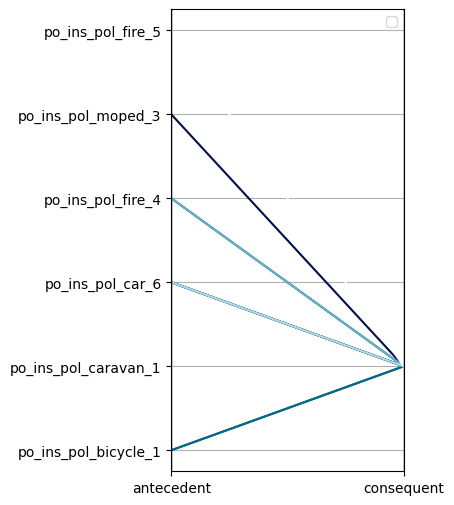

In [ ]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules_apriori_caravan)
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

**Training the Model**

In [ ]:
# Frequent Items with support 0.07% using Fpgrowth Algorithm
freq_items=fpgrowth(dummy,min_support=.0007,max_len =4,  use_colnames=True)
# Association Rules using Fpgrowth Algorithm
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
# Sort values based on confidence
fpgrowth_rules2=fpgrowth_rules.sort_values("confidence",ascending=False)

In [ ]:
fpgrowth_rules2.shape

(964, 10)

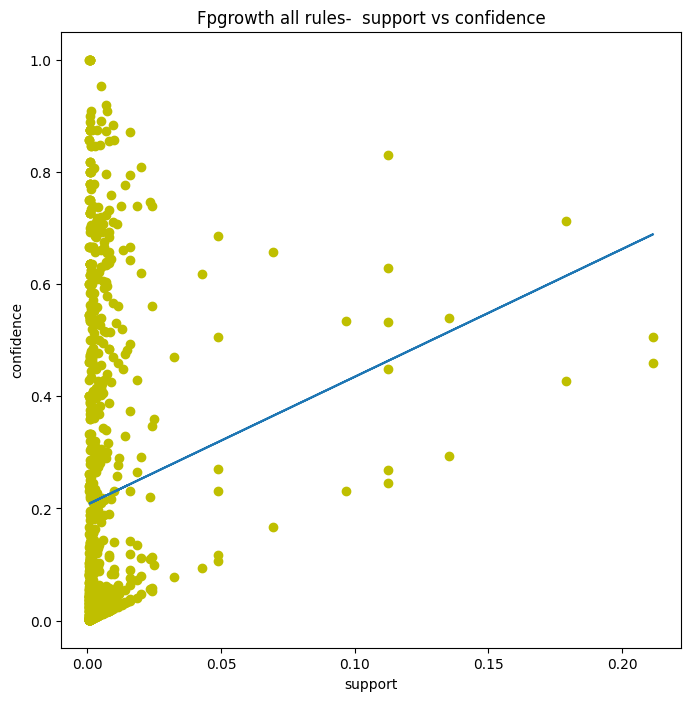

In [ ]:
plot_metrics_relationship(fpgrowth_rules, al='Fpgrowth all rules- ',col1='support', col2='confidence')

In [ ]:
# rules selecting caravan policy
fpg_caravan = fpgrowth_rules2[ (fpgrowth_rules2['consequents']== {'po_ins_pol_caravan_1'}      )]
#fpg_caravan_2=fpg_caravan[  (fpg_caravan['confidence'] >= 0.2) ]
#fpg_caravan_2=fpg_caravan.sort_values(by =['confidence'], ascending=False)
fpg_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
356,"(po_ins_pol_bicycle_1, po_ins_pol_car_6, po_in...",(po_ins_pol_caravan_1),0.004000,0.069125,0.000875,0.218750,3.164557,0.000598,1.191520,0.686747
336,"(po_ins_pol_bicycle_1, po_ins_pol_fire_4)",(po_ins_pol_caravan_1),0.005750,0.069125,0.001125,0.195652,2.830411,0.000728,1.157304,0.650434
87,"(po_ins_pol_moped_3, po_ins_pol_car_6, po_ins_...",(po_ins_pol_caravan_1),0.004500,0.069125,0.000750,0.166667,2.411091,0.000439,1.117050,0.587896
259,"(po_ins_pol_car_6, po_ins_pol_fire_4, po_ins_p...",(po_ins_pol_caravan_1),0.005375,0.069125,0.000875,0.162791,2.355019,0.000503,1.111878,0.578484
21,"(po_ins_pol_car_6, po_ins_pol_fire_5, po_ins_p...",(po_ins_pol_caravan_1),0.006375,0.069125,0.001000,0.156863,2.269262,0.000559,1.104061,0.562917
371,"(po_ins_pol_bicycle_1, po_ins_pol_fire_4, po_i...",(po_ins_pol_caravan_1),0.004875,0.069125,0.000750,0.153846,2.225622,0.000413,1.100125,0.553385
843,"(po_ins_pol_car_6, po_ins_pol_fire_4, po_ins_p...",(po_ins_pol_caravan_1),0.005750,0.069125,0.000875,0.152174,2.201431,0.000478,1.097955,0.548906
324,"(po_ins_pol_bicycle_1, po_ins_pol_car_6)",(po_ins_pol_caravan_1),0.009375,0.069125,0.001375,0.146667,2.121760,0.000727,1.090869,0.533697
641,"(po_ins_pol_car_6, po_ins_pol_fire_4, po_ins_p...",(po_ins_pol_caravan_1),0.112500,0.069125,0.016000,0.142222,2.057464,0.008223,1.085217,0.579115
246,"(po_ins_pol_fire_4, po_ins_pol_thirdparty_pvt_...",(po_ins_pol_caravan_1),0.007125,0.069125,0.001000,0.140351,2.030392,0.000507,1.082855,0.511126


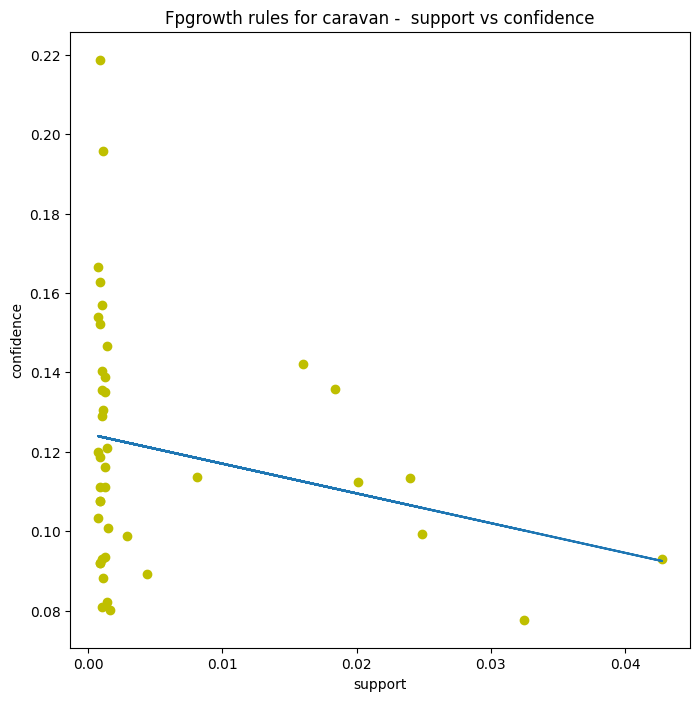

In [ ]:
plot_metrics_relationship(fpg_caravan, al='Fpgrowth rules for caravan - ',col1='support', col2='confidence')

# Recommendations using Fpgrowth Algorithm

In [ ]:
fpgrowth_rules.shape

(964, 10)

With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets.

In [ ]:
filtered_rules_fpg_caravan =fpg_caravan[(fpg_caravan['antecedent support'] > 0.007)&
                        (fpg_caravan['confidence'] > 0.115) &
                        (fpg_caravan['lift'] > 1)]


In [ ]:
filtered_rules_fpg_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
324,"(po_ins_pol_bicycle_1, po_ins_pol_car_6)",(po_ins_pol_caravan_1),0.009375,0.069125,0.001375,0.146667,2.121760,0.000727,1.090869,0.533697
641,"(po_ins_pol_car_6, po_ins_pol_fire_4, po_ins_p...",(po_ins_pol_caravan_1),0.112500,0.069125,0.016000,0.142222,2.057464,0.008223,1.085217,0.579115
246,"(po_ins_pol_fire_4, po_ins_pol_thirdparty_pvt_...",(po_ins_pol_caravan_1),0.007125,0.069125,0.001000,0.140351,2.030392,0.000507,1.082855,0.511126
80,"(po_ins_pol_moped_3, po_ins_pol_car_6)",(po_ins_pol_caravan_1),0.009000,0.069125,0.001250,0.138889,2.009243,0.000628,1.081016,0.506862
634,"(po_ins_pol_car_6, po_ins_pol_fire_4)",(po_ins_pol_caravan_1),0.135375,0.069125,0.018375,0.135734,1.963603,0.009017,1.077070,0.567566
274,"(po_ins_pol_car_6, po_ins_pol_thirdparty_pvt_2...",(po_ins_pol_caravan_1),0.007375,0.069125,0.001000,0.135593,1.961566,0.000490,1.076895,0.493845
331,"(po_ins_pol_bicycle_1, po_ins_pol_thirdparty_p...",(po_ins_pol_caravan_1),0.009250,0.069125,0.001250,0.135135,1.954939,0.000611,1.076324,0.493036
515,"(po_ins_pol_car_6, po_ins_pol_life_4, po_ins_p...",(po_ins_pol_caravan_1),0.008625,0.069125,0.001125,0.130435,1.886941,0.000529,1.070506,0.474131
233,"(po_ins_pol_fire_4, po_ins_pol_motorcycle_sc_4)",(po_ins_pol_caravan_1),0.007750,0.069125,0.001000,0.129032,1.866651,0.000464,1.068782,0.467908
508,"(po_ins_pol_car_6, po_ins_pol_life_4)",(po_ins_pol_caravan_1),0.011375,0.069125,0.001375,0.120879,1.748703,0.000589,1.058870,0.433074


In [ ]:
filtered_rules_fpg_caravan.shape

(12, 10)

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,10):
        if item == filtered_rules_fpg_caravan.iloc[i,1]:
            recommend.append(filtered_rules_fpg_caravan.iloc[i,0])

    return recommend

**5 Recommendations with caravan product**

In [ ]:
# rules selecting caravan policy
product_name = {'po_ins_pol_caravan_1'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'po_ins_pol_car_6', 'po_ins_pol_bicycle_1'})
frozenset({'po_ins_pol_car_6', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'})
frozenset({'po_ins_pol_motorcycle_sc_4', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'})
frozenset({'po_ins_pol_car_6', 'po_ins_pol_moped_3'})
frozenset({'po_ins_pol_car_6', 'po_ins_pol_fire_4'})


Association rules for caravan policy

{'po_ins_pol_car_6', 'po_ins_pol_bicycle_1'}

{'po_ins_pol_car_6', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'}

{'po_ins_pol_motorcycle_sc_4', 'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'}

{'po_ins_pol_car_6', 'po_ins_pol_moped_3'}

{'po_ins_pol_car_6', 'po_ins_pol_fire_4'}

# Model Evaluation

One of the most important features of any frequent itemset mining algorithm is that it should take lower timing and memory.

Best algorithm is used in run time of 2 models.

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time

l=[0.0005,0.0006,0.0007,0.0008] # # selection of support
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.0005,0.0006,0.0007,0.0008] # selection of support
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

<Axes: >

<Axes: >

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

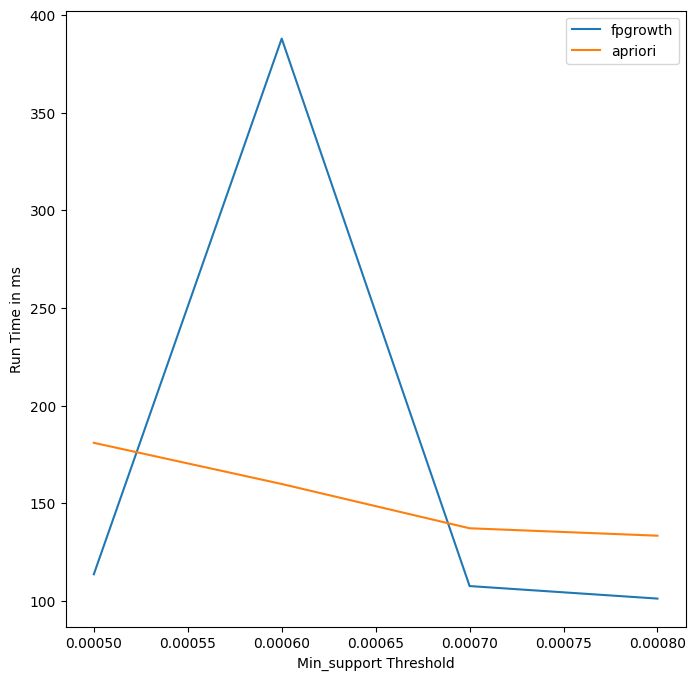

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

plt.savefig("Ap- FPG Runtime")

FPgrowth is the best algorithm as it takes less run time

Apriori and Fpgrowth give same set of rules. We are selecting Fpgrowth algorithm as it gives results in less run time. ♈

**Explain caravan customer** - using product premium details - choice of policies

**Model details**

Algorithm : Fpgrowth

minimum support 0.07%, metric="lift",min_threshold=0.8

**Results**

Frequent assocition with caravan policy

 {'po_ins_pol_car_6'}

 {'po_ins_pol_thirdparty_pvt_2'}

 {'po_ins_pol_fire_4'}

 {'po_ins_pol_car_6', 'po_ins_pol_thirdparty_pvt_2'}

 {'po_ins_pol_fire_4', 'po_ins_pol_thirdparty_pvt_2'}




customers who bought car policy with premium category 6 (1000 - 4999) also bought a caravan policy  ♈